In [142]:
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from functools import partial
import matplotlib.pyplot as plt

In [93]:
x_train, y_train = np.loadtxt("X_train.txt", delimiter=','), np.loadtxt("y_train.txt", delimiter=',')
x_test, y_test = np.loadtxt("X_val.txt", delimiter=','), np.loadtxt("y_val.txt", delimiter=',')
y_train = np.where(y_train==0, -1, y_train)
y_test = np.where(y_test==0, -1, y_test)
x_train = normalize(x_train, axis=1, norm='l1')
x_test = normalize(x_test, axis=1, norm='l1')
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

In [115]:
theta = np.random.randn(x_train.shape[1])
theta

array([ 0.75251905, -0.86512452, -1.12503589, -0.87032738,  0.63328105,
        0.50690458,  1.61230379,  0.39796389,  1.9338638 ,  0.32022846,
        0.2229138 ,  1.91452461,  0.92650107, -0.32046919, -0.23725216,
       -1.01071505, -0.67604309, -0.24989417, -0.06906168, -1.73825584,
       -1.77079741])

In [123]:
# Q5
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    
    res = 0
    
    for i in range(X.shape[0]):
        res += np.logaddexp(0, -np.asarray([y[i]]).reshape(-1,1) @ theta.reshape(1,-1) @ X[i, :])
    
    res /= X.shape[0]
    res += l2_param * np.power(np.linalg.norm(theta), 2)
    
    return res[0]
        

In [132]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    p = partial(f_objective, X=X, y=y, l2_param=l2_param)
    np.random.seed(42)
    init = np.random.randn(X.shape[1])
    res = minimize(p, init)
    
    return res.x

In [133]:
f_objective(theta, x_test, y_test, l2_param=0.15)

4.204436569739591

In [134]:
fit_logistic_reg(x_train, y_train, f_objective, l2_param=0.15)

array([ 1.15691960e-02,  3.36791993e-04,  2.19400099e-05, -4.41840572e-04,
        7.10089307e-02, -2.31106001e-03, -6.98399815e-04, -1.56476801e-03,
        5.01362020e-04, -1.16883287e-03, -1.17822997e-02,  2.77263336e-03,
       -2.54524348e-03,  5.20048081e-03, -2.36922075e-03, -1.43070708e-03,
        1.28889347e-03, -1.38525225e-03, -4.44549863e-03, -3.21646183e-03,
       -5.72872939e-03])

In [163]:
params = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000]
res = []
for param in params:
    theta = fit_logistic_reg(x_train, y_train, f_objective, l2_param=param)
    ll = log_likelihood(theta, x_test, y_test)
    print("val neg log likelihood for lambda = {} is {}".format(param, ll))
    res.append(ll)

val neg log likelihood for lambda = 1e-09 is 236.02083148017067
val neg log likelihood for lambda = 1e-08 is 236.02108948929623
val neg log likelihood for lambda = 1e-07 is 236.01445514132354
val neg log likelihood for lambda = 1e-06 is 235.96954637666923
val neg log likelihood for lambda = 1e-05 is 235.5680362276185
val neg log likelihood for lambda = 0.0001 is 233.68661131087472
val neg log likelihood for lambda = 0.001 is 244.32058856180257
val neg log likelihood for lambda = 0.01 is 269.7775206397925
val neg log likelihood for lambda = 0.1 is 276.40739994371876
val neg log likelihood for lambda = 1 is 277.1707686911918
val neg log likelihood for lambda = 10 is 277.24998997429293
val neg log likelihood for lambda = 100 is 277.25798306360264
val neg log likelihood for lambda = 1000 is 277.2587833142504
val neg log likelihood for lambda = 10000 is 277.2588633917613


In [169]:
params = np.power(10, np.arange(-5,-3,0.1))
print(params)
res = []
for param in params:
    theta = fit_logistic_reg(x_train, y_train, f_objective, l2_param=param)
    ll = log_likelihood(theta, x_test, y_test)
    print("val neg log likelihood for lambda = {} is {}".format(param, ll))
    res.append(ll)

[1.00000000e-05 1.25892541e-05 1.58489319e-05 1.99526231e-05
 2.51188643e-05 3.16227766e-05 3.98107171e-05 5.01187234e-05
 6.30957344e-05 7.94328235e-05 1.00000000e-04 1.25892541e-04
 1.58489319e-04 1.99526231e-04 2.51188643e-04 3.16227766e-04
 3.98107171e-04 5.01187234e-04 6.30957344e-04 7.94328235e-04]
val neg log likelihood for lambda = 1e-05 is 235.5680362276185
val neg log likelihood for lambda = 1.2589254117941661e-05 is 235.45162183206293
val neg log likelihood for lambda = 1.5848931924611107e-05 is 235.3185645723375
val neg log likelihood for lambda = 1.9952623149688746e-05 is 235.1388916718844
val neg log likelihood for lambda = 2.511886431509572e-05 is 234.96200803623458
val neg log likelihood for lambda = 3.1622776601683667e-05 is 234.75558762906076
val neg log likelihood for lambda = 3.981071705534953e-05 is 234.52947004623633
val neg log likelihood for lambda = 5.011872336272694e-05 is 234.2903373523557
val neg log likelihood for lambda = 6.309573444801891e-05 is 234.05711

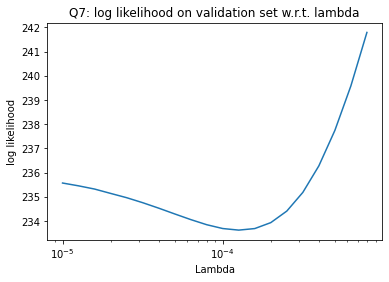

In [170]:
plt.xscale('log')
plt.plot(params, res)
plt.ylabel('log likelihood')
plt.xlabel('Lambda')
plt.title('Q7: log likelihood on validation set w.r.t. lambda')
plt.savefig('Q7')
plt.show()

In [161]:
def log_likelihood(theta, X, y):
    res = 0
    
    for i in range(X.shape[0]):
        res += np.logaddexp(0, -np.asarray([y[i]]).reshape(-1,1) @ theta.reshape(1,-1) @ X[i, :])
    
    return res[0]

In [171]:
 params[np.argmin(res)]

0.00012589254117941558